In [39]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Classification

<font color='green'>**CLASSIFICATION**</font>: Predicting classes

## Binary Classification

* For **binary** classification, we often speak of a **positive class** and a **negative class**, where the positive class is the one we are looking for.

Let's inspect dataset contaning handwritten digit images. Each image has 8x8=64 pixels.

In [8]:
digits = datasets.load_digits()

images = digits.data[:10,:]

images[0,:].shape

(64,)

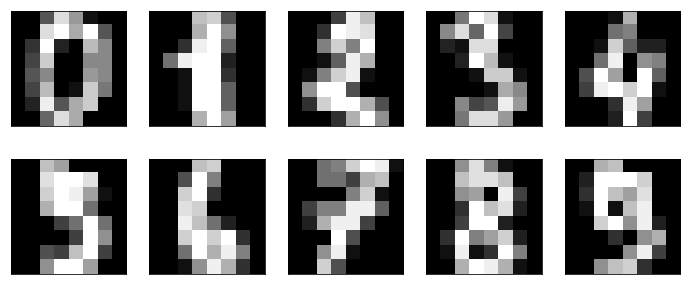

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(12,5), subplot_kw={'xticks':(),
                                                           'yticks':()})
for img, ax in zip(images, axes.ravel()):
    bitmap = img.reshape(8,8)
    ax.imshow(bitmap, cmap='gray')
plt.show()

Let's create **5-detector**:
* Positive class: **"five"**
* Negative class: **"not five"**

In [21]:
# predictor and target variabels
X = digits.data
y = digits.target == 5

print('X.shape = {}'.format(X.shape))
print('y.shape = {}'.format(y.shape))

X.shape = (1797, 64)
y.shape = (1797,)


In [24]:
# split data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# init classifier, train, predict
kNN_clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = kNN_clf.predict(X_test)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[400   2]
 [  1  47]]


* Binary Classifier predicted: 
    * 400 "not fives"
    * 47 "fives"
    * 1 "five" as "not five"
    * 2 "not fives"  as "fives"

## Multiclass Classification

In [25]:
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

kNN_clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = kNN_clf.predict(X_test)

# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  1  1 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


## Multilabel Classification

* In some cases we want the classifier to output multiple classes for each instance
* For example face recognition on image if there are more than one person
* or if we want to know the number is high (7,8,9) and odd (7 or 9)

In [34]:
y_large = digits.target >= 7
y_odd = digits.target % 2 == 1

y_multilabel = np.c_[y_large, y_odd]

In [35]:
y_multilabel.shape

(1797, 2)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, random_state=0)

kNN_clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = kNN_clf.predict(X_test)

y_pred[0]

array([False, False])

* First element checks if the number is large (7,8 or 9)
* Second element checks if the number is odd or not

In [45]:
# compute F_1 score for each label and take the average
y_pred = cross_val_predict(kNN_clf, X_test, y_test, cv=3)
f1 = f1_score(y_test, y_pred, average='macro')

print('F1 score: {:.3f}'.format(f1))

F1 score: 0.965


## Multioutput Classification

* generalization of multilabel classification where each class can have more than two possible values.

* Let's build a system that reduces noise from an image
* classifier output is multilabel (one label per pixel)
* each label can have multiple values (pixel intensity values from 0 to 255)

In [50]:
# let's add noise to the images
noise_train = np.random.randint(low=0, high=10, size=(len(X_train), 64))
noise_test = np.random.randint(low=0, high=10, size=(len(X_test), 64))

X_train_mod = X_train + noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

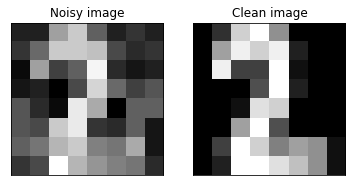

In [51]:
clean = X_train[0, :].reshape(8, 8)
noisy = X_train_mod[0, :].reshape(8, 8)

plt.subplot(1, 2, 1)
plt.title('Noisy image')
plt.imshow(noisy, cmap='gray')
plt.xticks(())
plt.yticks(())

plt.subplot(1, 2, 2)
plt.title('Clean image')
plt.imshow(clean, cmap='gray')
plt.xticks(())
plt.yticks(())

plt.show()

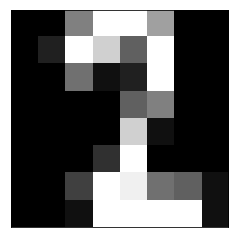

In [59]:
# train classifier and clean the image
knn_clf = KNeighborsClassifier().fit(X_train_mod, y_train_mod)

# predict numbers
y_pred = knn_clf.predict([X_test_mod[0, :]])

plt.imshow(y_pred.reshape(8,8), cmap='gray')
plt.xticks(())
plt.yticks(())
plt.show()